# LeNet-5 Implementation From Scratch

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

## Dataset

In [7]:
ROOt = '.data'
train_data = datasets.MNIST(root=ROOt, 
                            train=True, 
                            download=True)

train_transforms = transforms.Compose(
            [transforms.RandomRotation(5, fill=(0,)),
             transforms.RandomCrop(28, padding=2),
             transforms.ToTensor()])

test_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [8]:
train_data = datasets.MNIST(root=ROOt, 
                            train=True, 
                            download=True,
                       transform=train_transforms)

test_data = datasets.MNIST(root=ROOt,
                           train=False,
                           download=True,
                           transform=test_transforms)


In [9]:
VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(train_data,
                                           [n_train_examples, n_valid_examples])

In [10]:
import copy
valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

In [11]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 54000
Number of validation examples: 6000
Number of testing examples: 10000


In [12]:
BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

## Model

In [13]:
import torch.nn as nn

In [14]:
class LeNet(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)
        
    def forward(self, x): 
        x = F.relu(F.avg_pool2d(self.conv1(x), kernel_size=2, stride=2))
        x = F.relu(F.avg_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [15]:
model = LeNet()

In [16]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 61,706 trainable parameters


# Training 

### Optimizer:

In [17]:
opt = optim.SGD(model.parameters(), lr=0.1)

### Loss Function:

In [18]:
loss = nn.CrossEntropyLoss()

### Defining GPU:

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

__Moving the Optimizer and Loss function to the GPU__:

In [20]:
model = model.to(device)
loss = loss.to(device)

### Accuracy:

In [28]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [25]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_iterator:
        images = images.to(device)
        labels = labels.to(device)
        opt.zero_grad()
        # forward pass
        output = model(images)
        l = loss(output, labels)
        l.backward()
        opt.step()
        
        running_loss += l.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_iterator):.4f}")

        print("Training finished")

Epoch [1/10], Loss: 0.0027
Training finished
Epoch [1/10], Loss: 0.0054
Training finished
Epoch [1/10], Loss: 0.0082
Training finished
Epoch [1/10], Loss: 0.0109
Training finished
Epoch [1/10], Loss: 0.0136
Training finished
Epoch [1/10], Loss: 0.0163
Training finished
Epoch [1/10], Loss: 0.0191
Training finished
Epoch [1/10], Loss: 0.0218
Training finished
Epoch [1/10], Loss: 0.0245
Training finished
Epoch [1/10], Loss: 0.0273
Training finished
Epoch [1/10], Loss: 0.0300
Training finished
Epoch [1/10], Loss: 0.0327
Training finished
Epoch [1/10], Loss: 0.0354
Training finished
Epoch [1/10], Loss: 0.0382
Training finished
Epoch [1/10], Loss: 0.0409
Training finished
Epoch [1/10], Loss: 0.0436
Training finished
Epoch [1/10], Loss: 0.0463
Training finished
Epoch [1/10], Loss: 0.0491
Training finished
Epoch [1/10], Loss: 0.0518
Training finished
Epoch [1/10], Loss: 0.0545
Training finished
Epoch [1/10], Loss: 0.0573
Training finished
Epoch [1/10], Loss: 0.0600
Training finished
Epoch [1/1

Epoch [1/10], Loss: 0.5154
Training finished
Epoch [1/10], Loss: 0.5181
Training finished
Epoch [1/10], Loss: 0.5208
Training finished
Epoch [1/10], Loss: 0.5236
Training finished
Epoch [1/10], Loss: 0.5263
Training finished
Epoch [1/10], Loss: 0.5290
Training finished
Epoch [1/10], Loss: 0.5318
Training finished
Epoch [1/10], Loss: 0.5345
Training finished
Epoch [1/10], Loss: 0.5372
Training finished
Epoch [1/10], Loss: 0.5399
Training finished
Epoch [1/10], Loss: 0.5427
Training finished
Epoch [1/10], Loss: 0.5454
Training finished
Epoch [1/10], Loss: 0.5481
Training finished
Epoch [1/10], Loss: 0.5508
Training finished
Epoch [1/10], Loss: 0.5536
Training finished
Epoch [1/10], Loss: 0.5563
Training finished
Epoch [1/10], Loss: 0.5590
Training finished
Epoch [1/10], Loss: 0.5617
Training finished
Epoch [1/10], Loss: 0.5645
Training finished
Epoch [1/10], Loss: 0.5672
Training finished
Epoch [1/10], Loss: 0.5699
Training finished
Epoch [1/10], Loss: 0.5726
Training finished
Epoch [1/1

Epoch [1/10], Loss: 1.0320
Training finished
Epoch [1/10], Loss: 1.0346
Training finished
Epoch [1/10], Loss: 1.0373
Training finished
Epoch [1/10], Loss: 1.0400
Training finished
Epoch [1/10], Loss: 1.0427
Training finished
Epoch [1/10], Loss: 1.0454
Training finished
Epoch [1/10], Loss: 1.0480
Training finished
Epoch [1/10], Loss: 1.0507
Training finished
Epoch [1/10], Loss: 1.0534
Training finished
Epoch [1/10], Loss: 1.0561
Training finished
Epoch [1/10], Loss: 1.0587
Training finished
Epoch [1/10], Loss: 1.0614
Training finished
Epoch [1/10], Loss: 1.0641
Training finished
Epoch [1/10], Loss: 1.0667
Training finished
Epoch [1/10], Loss: 1.0694
Training finished
Epoch [1/10], Loss: 1.0720
Training finished
Epoch [1/10], Loss: 1.0747
Training finished
Epoch [1/10], Loss: 1.0773
Training finished
Epoch [1/10], Loss: 1.0800
Training finished
Epoch [1/10], Loss: 1.0826
Training finished
Epoch [1/10], Loss: 1.0853
Training finished
Epoch [1/10], Loss: 1.0879
Training finished
Epoch [1/1

Epoch [1/10], Loss: 1.3663
Training finished
Epoch [1/10], Loss: 1.3674
Training finished
Epoch [1/10], Loss: 1.3685
Training finished
Epoch [1/10], Loss: 1.3696
Training finished
Epoch [1/10], Loss: 1.3710
Training finished
Epoch [1/10], Loss: 1.3724
Training finished
Epoch [1/10], Loss: 1.3732
Training finished
Epoch [1/10], Loss: 1.3744
Training finished
Epoch [1/10], Loss: 1.3754
Training finished
Epoch [1/10], Loss: 1.3767
Training finished
Epoch [1/10], Loss: 1.3776
Training finished
Epoch [1/10], Loss: 1.3785
Training finished
Epoch [1/10], Loss: 1.3795
Training finished
Epoch [1/10], Loss: 1.3803
Training finished
Epoch [1/10], Loss: 1.3817
Training finished
Epoch [1/10], Loss: 1.3830
Training finished
Epoch [1/10], Loss: 1.3841
Training finished
Epoch [1/10], Loss: 1.3852
Training finished
Epoch [1/10], Loss: 1.3862
Training finished
Epoch [1/10], Loss: 1.3871
Training finished
Epoch [1/10], Loss: 1.3881
Training finished
Epoch [1/10], Loss: 1.3890
Training finished
Epoch [1/1

Epoch [1/10], Loss: 1.5190
Training finished
Epoch [1/10], Loss: 1.5196
Training finished
Epoch [1/10], Loss: 1.5204
Training finished
Epoch [1/10], Loss: 1.5209
Training finished
Epoch [1/10], Loss: 1.5220
Training finished
Epoch [1/10], Loss: 1.5232
Training finished
Epoch [1/10], Loss: 1.5238
Training finished
Epoch [1/10], Loss: 1.5244
Training finished
Epoch [1/10], Loss: 1.5249
Training finished
Epoch [1/10], Loss: 1.5254
Training finished
Epoch [1/10], Loss: 1.5259
Training finished
Epoch [1/10], Loss: 1.5265
Training finished
Epoch [1/10], Loss: 1.5268
Training finished
Epoch [1/10], Loss: 1.5275
Training finished
Epoch [1/10], Loss: 1.5282
Training finished
Epoch [1/10], Loss: 1.5287
Training finished
Epoch [1/10], Loss: 1.5291
Training finished
Epoch [1/10], Loss: 1.5294
Training finished
Epoch [1/10], Loss: 1.5300
Training finished
Epoch [1/10], Loss: 1.5303
Training finished
Epoch [1/10], Loss: 1.5310
Training finished
Epoch [1/10], Loss: 1.5315
Training finished
Epoch [1/1

Epoch [2/10], Loss: 0.0412
Training finished
Epoch [2/10], Loss: 0.0415
Training finished
Epoch [2/10], Loss: 0.0419
Training finished
Epoch [2/10], Loss: 0.0422
Training finished
Epoch [2/10], Loss: 0.0426
Training finished
Epoch [2/10], Loss: 0.0431
Training finished
Epoch [2/10], Loss: 0.0435
Training finished
Epoch [2/10], Loss: 0.0440
Training finished
Epoch [2/10], Loss: 0.0448
Training finished
Epoch [2/10], Loss: 0.0455
Training finished
Epoch [2/10], Loss: 0.0459
Training finished
Epoch [2/10], Loss: 0.0465
Training finished
Epoch [2/10], Loss: 0.0473
Training finished
Epoch [2/10], Loss: 0.0480
Training finished
Epoch [2/10], Loss: 0.0488
Training finished
Epoch [2/10], Loss: 0.0496
Training finished
Epoch [2/10], Loss: 0.0503
Training finished
Epoch [2/10], Loss: 0.0508
Training finished
Epoch [2/10], Loss: 0.0511
Training finished
Epoch [2/10], Loss: 0.0516
Training finished
Epoch [2/10], Loss: 0.0521
Training finished
Epoch [2/10], Loss: 0.0525
Training finished
Epoch [2/1

Epoch [2/10], Loss: 0.1118
Training finished
Epoch [2/10], Loss: 0.1120
Training finished
Epoch [2/10], Loss: 0.1125
Training finished
Epoch [2/10], Loss: 0.1130
Training finished
Epoch [2/10], Loss: 0.1134
Training finished
Epoch [2/10], Loss: 0.1141
Training finished
Epoch [2/10], Loss: 0.1147
Training finished
Epoch [2/10], Loss: 0.1152
Training finished
Epoch [2/10], Loss: 0.1155
Training finished
Epoch [2/10], Loss: 0.1158
Training finished
Epoch [2/10], Loss: 0.1162
Training finished
Epoch [2/10], Loss: 0.1165
Training finished
Epoch [2/10], Loss: 0.1167
Training finished
Epoch [2/10], Loss: 0.1170
Training finished
Epoch [2/10], Loss: 0.1173
Training finished
Epoch [2/10], Loss: 0.1176
Training finished
Epoch [2/10], Loss: 0.1179
Training finished
Epoch [2/10], Loss: 0.1182
Training finished
Epoch [2/10], Loss: 0.1184
Training finished
Epoch [2/10], Loss: 0.1189
Training finished
Epoch [2/10], Loss: 0.1193
Training finished
Epoch [2/10], Loss: 0.1195
Training finished
Epoch [2/1

Epoch [2/10], Loss: 0.1689
Training finished
Epoch [2/10], Loss: 0.1692
Training finished
Epoch [2/10], Loss: 0.1696
Training finished
Epoch [2/10], Loss: 0.1699
Training finished
Epoch [2/10], Loss: 0.1702
Training finished
Epoch [2/10], Loss: 0.1704
Training finished
Epoch [2/10], Loss: 0.1706
Training finished
Epoch [2/10], Loss: 0.1708
Training finished
Epoch [2/10], Loss: 0.1710
Training finished
Epoch [2/10], Loss: 0.1714
Training finished
Epoch [2/10], Loss: 0.1717
Training finished
Epoch [2/10], Loss: 0.1720
Training finished
Epoch [2/10], Loss: 0.1722
Training finished
Epoch [2/10], Loss: 0.1726
Training finished
Epoch [2/10], Loss: 0.1727
Training finished
Epoch [2/10], Loss: 0.1730
Training finished
Epoch [2/10], Loss: 0.1732
Training finished
Epoch [2/10], Loss: 0.1738
Training finished
Epoch [2/10], Loss: 0.1742
Training finished
Epoch [2/10], Loss: 0.1746
Training finished
Epoch [2/10], Loss: 0.1751
Training finished
Epoch [2/10], Loss: 0.1753
Training finished
Epoch [2/1

Epoch [2/10], Loss: 0.2217
Training finished
Epoch [2/10], Loss: 0.2221
Training finished
Epoch [2/10], Loss: 0.2222
Training finished
Epoch [2/10], Loss: 0.2227
Training finished
Epoch [2/10], Loss: 0.2229
Training finished
Epoch [2/10], Loss: 0.2232
Training finished
Epoch [2/10], Loss: 0.2236
Training finished
Epoch [2/10], Loss: 0.2239
Training finished
Epoch [2/10], Loss: 0.2242
Training finished
Epoch [2/10], Loss: 0.2245
Training finished
Epoch [2/10], Loss: 0.2250
Training finished
Epoch [2/10], Loss: 0.2252
Training finished
Epoch [2/10], Loss: 0.2254
Training finished
Epoch [2/10], Loss: 0.2257
Training finished
Epoch [2/10], Loss: 0.2260
Training finished
Epoch [2/10], Loss: 0.2262
Training finished
Epoch [2/10], Loss: 0.2265
Training finished
Epoch [2/10], Loss: 0.2268
Training finished
Epoch [2/10], Loss: 0.2268
Training finished
Epoch [2/10], Loss: 0.2270
Training finished
Epoch [2/10], Loss: 0.2273
Training finished
Epoch [2/10], Loss: 0.2275
Training finished
Epoch [2/1

Epoch [2/10], Loss: 0.2686
Training finished
Epoch [2/10], Loss: 0.2687
Training finished
Epoch [2/10], Loss: 0.2689
Training finished
Epoch [2/10], Loss: 0.2691
Training finished
Epoch [2/10], Loss: 0.2691
Training finished
Epoch [2/10], Loss: 0.2694
Training finished
Epoch [3/10], Loss: 0.0002
Training finished
Epoch [3/10], Loss: 0.0004
Training finished
Epoch [3/10], Loss: 0.0006
Training finished
Epoch [3/10], Loss: 0.0007
Training finished
Epoch [3/10], Loss: 0.0009
Training finished
Epoch [3/10], Loss: 0.0010
Training finished
Epoch [3/10], Loss: 0.0013
Training finished
Epoch [3/10], Loss: 0.0015
Training finished
Epoch [3/10], Loss: 0.0015
Training finished
Epoch [3/10], Loss: 0.0017
Training finished
Epoch [3/10], Loss: 0.0019
Training finished
Epoch [3/10], Loss: 0.0021
Training finished
Epoch [3/10], Loss: 0.0022
Training finished
Epoch [3/10], Loss: 0.0025
Training finished
Epoch [3/10], Loss: 0.0027
Training finished
Epoch [3/10], Loss: 0.0028
Training finished
Epoch [3/1

Epoch [3/10], Loss: 0.0372
Training finished
Epoch [3/10], Loss: 0.0375
Training finished
Epoch [3/10], Loss: 0.0376
Training finished
Epoch [3/10], Loss: 0.0378
Training finished
Epoch [3/10], Loss: 0.0380
Training finished
Epoch [3/10], Loss: 0.0383
Training finished
Epoch [3/10], Loss: 0.0384
Training finished
Epoch [3/10], Loss: 0.0385
Training finished
Epoch [3/10], Loss: 0.0387
Training finished
Epoch [3/10], Loss: 0.0389
Training finished
Epoch [3/10], Loss: 0.0394
Training finished
Epoch [3/10], Loss: 0.0397
Training finished
Epoch [3/10], Loss: 0.0401
Training finished
Epoch [3/10], Loss: 0.0404
Training finished
Epoch [3/10], Loss: 0.0406
Training finished
Epoch [3/10], Loss: 0.0410
Training finished
Epoch [3/10], Loss: 0.0412
Training finished
Epoch [3/10], Loss: 0.0413
Training finished
Epoch [3/10], Loss: 0.0414
Training finished
Epoch [3/10], Loss: 0.0416
Training finished
Epoch [3/10], Loss: 0.0418
Training finished
Epoch [3/10], Loss: 0.0421
Training finished
Epoch [3/1

Epoch [3/10], Loss: 0.0747
Training finished
Epoch [3/10], Loss: 0.0749
Training finished
Epoch [3/10], Loss: 0.0750
Training finished
Epoch [3/10], Loss: 0.0752
Training finished
Epoch [3/10], Loss: 0.0753
Training finished
Epoch [3/10], Loss: 0.0755
Training finished
Epoch [3/10], Loss: 0.0758
Training finished
Epoch [3/10], Loss: 0.0759
Training finished
Epoch [3/10], Loss: 0.0762
Training finished
Epoch [3/10], Loss: 0.0764
Training finished
Epoch [3/10], Loss: 0.0765
Training finished
Epoch [3/10], Loss: 0.0767
Training finished
Epoch [3/10], Loss: 0.0769
Training finished
Epoch [3/10], Loss: 0.0771
Training finished
Epoch [3/10], Loss: 0.0772
Training finished
Epoch [3/10], Loss: 0.0775
Training finished
Epoch [3/10], Loss: 0.0778
Training finished
Epoch [3/10], Loss: 0.0780
Training finished
Epoch [3/10], Loss: 0.0783
Training finished
Epoch [3/10], Loss: 0.0785
Training finished
Epoch [3/10], Loss: 0.0787
Training finished
Epoch [3/10], Loss: 0.0789
Training finished
Epoch [3/1

Epoch [3/10], Loss: 0.1106
Training finished
Epoch [3/10], Loss: 0.1109
Training finished
Epoch [3/10], Loss: 0.1112
Training finished
Epoch [3/10], Loss: 0.1114
Training finished
Epoch [3/10], Loss: 0.1116
Training finished
Epoch [3/10], Loss: 0.1118
Training finished
Epoch [3/10], Loss: 0.1119
Training finished
Epoch [3/10], Loss: 0.1120
Training finished
Epoch [3/10], Loss: 0.1121
Training finished
Epoch [3/10], Loss: 0.1123
Training finished
Epoch [3/10], Loss: 0.1127
Training finished
Epoch [3/10], Loss: 0.1131
Training finished
Epoch [3/10], Loss: 0.1133
Training finished
Epoch [3/10], Loss: 0.1136
Training finished
Epoch [3/10], Loss: 0.1138
Training finished
Epoch [3/10], Loss: 0.1139
Training finished
Epoch [3/10], Loss: 0.1140
Training finished
Epoch [3/10], Loss: 0.1142
Training finished
Epoch [3/10], Loss: 0.1143
Training finished
Epoch [3/10], Loss: 0.1144
Training finished
Epoch [3/10], Loss: 0.1147
Training finished
Epoch [3/10], Loss: 0.1148
Training finished
Epoch [3/1

Epoch [3/10], Loss: 0.1458
Training finished
Epoch [3/10], Loss: 0.1459
Training finished
Epoch [3/10], Loss: 0.1463
Training finished
Epoch [3/10], Loss: 0.1466
Training finished
Epoch [3/10], Loss: 0.1467
Training finished
Epoch [3/10], Loss: 0.1467
Training finished
Epoch [3/10], Loss: 0.1469
Training finished
Epoch [3/10], Loss: 0.1470
Training finished
Epoch [3/10], Loss: 0.1470
Training finished
Epoch [3/10], Loss: 0.1471
Training finished
Epoch [3/10], Loss: 0.1472
Training finished
Epoch [3/10], Loss: 0.1475
Training finished
Epoch [3/10], Loss: 0.1477
Training finished
Epoch [3/10], Loss: 0.1479
Training finished
Epoch [3/10], Loss: 0.1480
Training finished
Epoch [3/10], Loss: 0.1482
Training finished
Epoch [3/10], Loss: 0.1483
Training finished
Epoch [3/10], Loss: 0.1487
Training finished
Epoch [3/10], Loss: 0.1490
Training finished
Epoch [3/10], Loss: 0.1491
Training finished
Epoch [3/10], Loss: 0.1492
Training finished
Epoch [3/10], Loss: 0.1494
Training finished
Epoch [3/1

Epoch [4/10], Loss: 0.0139
Training finished
Epoch [4/10], Loss: 0.0141
Training finished
Epoch [4/10], Loss: 0.0143
Training finished
Epoch [4/10], Loss: 0.0145
Training finished
Epoch [4/10], Loss: 0.0146
Training finished
Epoch [4/10], Loss: 0.0146
Training finished
Epoch [4/10], Loss: 0.0147
Training finished
Epoch [4/10], Loss: 0.0148
Training finished
Epoch [4/10], Loss: 0.0151
Training finished
Epoch [4/10], Loss: 0.0153
Training finished
Epoch [4/10], Loss: 0.0156
Training finished
Epoch [4/10], Loss: 0.0157
Training finished
Epoch [4/10], Loss: 0.0158
Training finished
Epoch [4/10], Loss: 0.0160
Training finished
Epoch [4/10], Loss: 0.0164
Training finished
Epoch [4/10], Loss: 0.0166
Training finished
Epoch [4/10], Loss: 0.0167
Training finished
Epoch [4/10], Loss: 0.0168
Training finished
Epoch [4/10], Loss: 0.0169
Training finished
Epoch [4/10], Loss: 0.0171
Training finished
Epoch [4/10], Loss: 0.0171
Training finished
Epoch [4/10], Loss: 0.0173
Training finished
Epoch [4/1

Epoch [4/10], Loss: 0.0431
Training finished
Epoch [4/10], Loss: 0.0433
Training finished
Epoch [4/10], Loss: 0.0436
Training finished
Epoch [4/10], Loss: 0.0436
Training finished
Epoch [4/10], Loss: 0.0436
Training finished
Epoch [4/10], Loss: 0.0438
Training finished
Epoch [4/10], Loss: 0.0441
Training finished
Epoch [4/10], Loss: 0.0443
Training finished
Epoch [4/10], Loss: 0.0444
Training finished
Epoch [4/10], Loss: 0.0445
Training finished
Epoch [4/10], Loss: 0.0447
Training finished
Epoch [4/10], Loss: 0.0448
Training finished
Epoch [4/10], Loss: 0.0449
Training finished
Epoch [4/10], Loss: 0.0451
Training finished
Epoch [4/10], Loss: 0.0453
Training finished
Epoch [4/10], Loss: 0.0454
Training finished
Epoch [4/10], Loss: 0.0457
Training finished
Epoch [4/10], Loss: 0.0461
Training finished
Epoch [4/10], Loss: 0.0462
Training finished
Epoch [4/10], Loss: 0.0465
Training finished
Epoch [4/10], Loss: 0.0466
Training finished
Epoch [4/10], Loss: 0.0467
Training finished
Epoch [4/1

Epoch [4/10], Loss: 0.0739
Training finished
Epoch [4/10], Loss: 0.0743
Training finished
Epoch [4/10], Loss: 0.0744
Training finished
Epoch [4/10], Loss: 0.0745
Training finished
Epoch [4/10], Loss: 0.0746
Training finished
Epoch [4/10], Loss: 0.0748
Training finished
Epoch [4/10], Loss: 0.0751
Training finished
Epoch [4/10], Loss: 0.0755
Training finished
Epoch [4/10], Loss: 0.0756
Training finished
Epoch [4/10], Loss: 0.0757
Training finished
Epoch [4/10], Loss: 0.0758
Training finished
Epoch [4/10], Loss: 0.0759
Training finished
Epoch [4/10], Loss: 0.0762
Training finished
Epoch [4/10], Loss: 0.0763
Training finished
Epoch [4/10], Loss: 0.0764
Training finished
Epoch [4/10], Loss: 0.0765
Training finished
Epoch [4/10], Loss: 0.0767
Training finished
Epoch [4/10], Loss: 0.0768
Training finished
Epoch [4/10], Loss: 0.0769
Training finished
Epoch [4/10], Loss: 0.0770
Training finished
Epoch [4/10], Loss: 0.0771
Training finished
Epoch [4/10], Loss: 0.0774
Training finished
Epoch [4/1

Epoch [4/10], Loss: 0.1014
Training finished
Epoch [4/10], Loss: 0.1017
Training finished
Epoch [4/10], Loss: 0.1019
Training finished
Epoch [4/10], Loss: 0.1020
Training finished
Epoch [4/10], Loss: 0.1022
Training finished
Epoch [4/10], Loss: 0.1023
Training finished
Epoch [4/10], Loss: 0.1025
Training finished
Epoch [4/10], Loss: 0.1027
Training finished
Epoch [4/10], Loss: 0.1027
Training finished
Epoch [4/10], Loss: 0.1028
Training finished
Epoch [4/10], Loss: 0.1028
Training finished
Epoch [4/10], Loss: 0.1030
Training finished
Epoch [4/10], Loss: 0.1032
Training finished
Epoch [4/10], Loss: 0.1032
Training finished
Epoch [4/10], Loss: 0.1035
Training finished
Epoch [4/10], Loss: 0.1036
Training finished
Epoch [4/10], Loss: 0.1038
Training finished
Epoch [4/10], Loss: 0.1039
Training finished
Epoch [4/10], Loss: 0.1040
Training finished
Epoch [4/10], Loss: 0.1041
Training finished
Epoch [4/10], Loss: 0.1042
Training finished
Epoch [4/10], Loss: 0.1043
Training finished
Epoch [4/1

Epoch [4/10], Loss: 0.1277
Training finished
Epoch [4/10], Loss: 0.1278
Training finished
Epoch [4/10], Loss: 0.1279
Training finished
Epoch [4/10], Loss: 0.1280
Training finished
Epoch [4/10], Loss: 0.1282
Training finished
Epoch [4/10], Loss: 0.1282
Training finished
Epoch [4/10], Loss: 0.1283
Training finished
Epoch [4/10], Loss: 0.1284
Training finished
Epoch [4/10], Loss: 0.1285
Training finished
Epoch [4/10], Loss: 0.1288
Training finished
Epoch [4/10], Loss: 0.1290
Training finished
Epoch [4/10], Loss: 0.1292
Training finished
Epoch [4/10], Loss: 0.1293
Training finished
Epoch [4/10], Loss: 0.1294
Training finished
Epoch [4/10], Loss: 0.1295
Training finished
Epoch [5/10], Loss: 0.0001
Training finished
Epoch [5/10], Loss: 0.0003
Training finished
Epoch [5/10], Loss: 0.0003
Training finished
Epoch [5/10], Loss: 0.0006
Training finished
Epoch [5/10], Loss: 0.0007
Training finished
Epoch [5/10], Loss: 0.0007
Training finished
Epoch [5/10], Loss: 0.0008
Training finished
Epoch [5/1

Epoch [5/10], Loss: 0.0233
Training finished
Epoch [5/10], Loss: 0.0234
Training finished
Epoch [5/10], Loss: 0.0236
Training finished
Epoch [5/10], Loss: 0.0237
Training finished
Epoch [5/10], Loss: 0.0238
Training finished
Epoch [5/10], Loss: 0.0239
Training finished
Epoch [5/10], Loss: 0.0239
Training finished
Epoch [5/10], Loss: 0.0240
Training finished
Epoch [5/10], Loss: 0.0242
Training finished
Epoch [5/10], Loss: 0.0243
Training finished
Epoch [5/10], Loss: 0.0244
Training finished
Epoch [5/10], Loss: 0.0245
Training finished
Epoch [5/10], Loss: 0.0246
Training finished
Epoch [5/10], Loss: 0.0247
Training finished
Epoch [5/10], Loss: 0.0248
Training finished
Epoch [5/10], Loss: 0.0249
Training finished
Epoch [5/10], Loss: 0.0249
Training finished
Epoch [5/10], Loss: 0.0252
Training finished
Epoch [5/10], Loss: 0.0253
Training finished
Epoch [5/10], Loss: 0.0255
Training finished
Epoch [5/10], Loss: 0.0256
Training finished
Epoch [5/10], Loss: 0.0259
Training finished
Epoch [5/1

Epoch [5/10], Loss: 0.0475
Training finished
Epoch [5/10], Loss: 0.0476
Training finished
Epoch [5/10], Loss: 0.0478
Training finished
Epoch [5/10], Loss: 0.0480
Training finished
Epoch [5/10], Loss: 0.0483
Training finished
Epoch [5/10], Loss: 0.0484
Training finished
Epoch [5/10], Loss: 0.0486
Training finished
Epoch [5/10], Loss: 0.0488
Training finished
Epoch [5/10], Loss: 0.0489
Training finished
Epoch [5/10], Loss: 0.0490
Training finished
Epoch [5/10], Loss: 0.0492
Training finished
Epoch [5/10], Loss: 0.0493
Training finished
Epoch [5/10], Loss: 0.0494
Training finished
Epoch [5/10], Loss: 0.0494
Training finished
Epoch [5/10], Loss: 0.0495
Training finished
Epoch [5/10], Loss: 0.0498
Training finished
Epoch [5/10], Loss: 0.0499
Training finished
Epoch [5/10], Loss: 0.0500
Training finished
Epoch [5/10], Loss: 0.0501
Training finished
Epoch [5/10], Loss: 0.0502
Training finished
Epoch [5/10], Loss: 0.0503
Training finished
Epoch [5/10], Loss: 0.0504
Training finished
Epoch [5/1

Epoch [5/10], Loss: 0.0713
Training finished
Epoch [5/10], Loss: 0.0713
Training finished
Epoch [5/10], Loss: 0.0714
Training finished
Epoch [5/10], Loss: 0.0715
Training finished
Epoch [5/10], Loss: 0.0716
Training finished
Epoch [5/10], Loss: 0.0719
Training finished
Epoch [5/10], Loss: 0.0720
Training finished
Epoch [5/10], Loss: 0.0721
Training finished
Epoch [5/10], Loss: 0.0722
Training finished
Epoch [5/10], Loss: 0.0723
Training finished
Epoch [5/10], Loss: 0.0725
Training finished
Epoch [5/10], Loss: 0.0726
Training finished
Epoch [5/10], Loss: 0.0726
Training finished
Epoch [5/10], Loss: 0.0727
Training finished
Epoch [5/10], Loss: 0.0728
Training finished
Epoch [5/10], Loss: 0.0728
Training finished
Epoch [5/10], Loss: 0.0729
Training finished
Epoch [5/10], Loss: 0.0731
Training finished
Epoch [5/10], Loss: 0.0732
Training finished
Epoch [5/10], Loss: 0.0733
Training finished
Epoch [5/10], Loss: 0.0734
Training finished
Epoch [5/10], Loss: 0.0735
Training finished
Epoch [5/1

Epoch [5/10], Loss: 0.0942
Training finished
Epoch [5/10], Loss: 0.0943
Training finished
Epoch [5/10], Loss: 0.0944
Training finished
Epoch [5/10], Loss: 0.0945
Training finished
Epoch [5/10], Loss: 0.0945
Training finished
Epoch [5/10], Loss: 0.0947
Training finished
Epoch [5/10], Loss: 0.0947
Training finished
Epoch [5/10], Loss: 0.0947
Training finished
Epoch [5/10], Loss: 0.0948
Training finished
Epoch [5/10], Loss: 0.0949
Training finished
Epoch [5/10], Loss: 0.0951
Training finished
Epoch [5/10], Loss: 0.0951
Training finished
Epoch [5/10], Loss: 0.0953
Training finished
Epoch [5/10], Loss: 0.0953
Training finished
Epoch [5/10], Loss: 0.0954
Training finished
Epoch [5/10], Loss: 0.0957
Training finished
Epoch [5/10], Loss: 0.0957
Training finished
Epoch [5/10], Loss: 0.0959
Training finished
Epoch [5/10], Loss: 0.0960
Training finished
Epoch [5/10], Loss: 0.0962
Training finished
Epoch [5/10], Loss: 0.0962
Training finished
Epoch [5/10], Loss: 0.0965
Training finished
Epoch [5/1

Epoch [6/10], Loss: 0.0084
Training finished
Epoch [6/10], Loss: 0.0086
Training finished
Epoch [6/10], Loss: 0.0087
Training finished
Epoch [6/10], Loss: 0.0088
Training finished
Epoch [6/10], Loss: 0.0088
Training finished
Epoch [6/10], Loss: 0.0089
Training finished
Epoch [6/10], Loss: 0.0091
Training finished
Epoch [6/10], Loss: 0.0092
Training finished
Epoch [6/10], Loss: 0.0092
Training finished
Epoch [6/10], Loss: 0.0094
Training finished
Epoch [6/10], Loss: 0.0095
Training finished
Epoch [6/10], Loss: 0.0097
Training finished
Epoch [6/10], Loss: 0.0100
Training finished
Epoch [6/10], Loss: 0.0102
Training finished
Epoch [6/10], Loss: 0.0102
Training finished
Epoch [6/10], Loss: 0.0102
Training finished
Epoch [6/10], Loss: 0.0105
Training finished
Epoch [6/10], Loss: 0.0106
Training finished
Epoch [6/10], Loss: 0.0107
Training finished
Epoch [6/10], Loss: 0.0108
Training finished
Epoch [6/10], Loss: 0.0109
Training finished
Epoch [6/10], Loss: 0.0110
Training finished
Epoch [6/1

Epoch [6/10], Loss: 0.0293
Training finished
Epoch [6/10], Loss: 0.0294
Training finished
Epoch [6/10], Loss: 0.0296
Training finished
Epoch [6/10], Loss: 0.0297
Training finished
Epoch [6/10], Loss: 0.0299
Training finished
Epoch [6/10], Loss: 0.0300
Training finished
Epoch [6/10], Loss: 0.0300
Training finished
Epoch [6/10], Loss: 0.0301
Training finished
Epoch [6/10], Loss: 0.0301
Training finished
Epoch [6/10], Loss: 0.0302
Training finished
Epoch [6/10], Loss: 0.0304
Training finished
Epoch [6/10], Loss: 0.0304
Training finished
Epoch [6/10], Loss: 0.0304
Training finished
Epoch [6/10], Loss: 0.0306
Training finished
Epoch [6/10], Loss: 0.0307
Training finished
Epoch [6/10], Loss: 0.0308
Training finished
Epoch [6/10], Loss: 0.0309
Training finished
Epoch [6/10], Loss: 0.0309
Training finished
Epoch [6/10], Loss: 0.0311
Training finished
Epoch [6/10], Loss: 0.0312
Training finished
Epoch [6/10], Loss: 0.0314
Training finished
Epoch [6/10], Loss: 0.0315
Training finished
Epoch [6/1

Epoch [6/10], Loss: 0.0506
Training finished
Epoch [6/10], Loss: 0.0506
Training finished
Epoch [6/10], Loss: 0.0508
Training finished
Epoch [6/10], Loss: 0.0510
Training finished
Epoch [6/10], Loss: 0.0511
Training finished
Epoch [6/10], Loss: 0.0513
Training finished
Epoch [6/10], Loss: 0.0514
Training finished
Epoch [6/10], Loss: 0.0515
Training finished
Epoch [6/10], Loss: 0.0515
Training finished
Epoch [6/10], Loss: 0.0516
Training finished
Epoch [6/10], Loss: 0.0517
Training finished
Epoch [6/10], Loss: 0.0518
Training finished
Epoch [6/10], Loss: 0.0519
Training finished
Epoch [6/10], Loss: 0.0520
Training finished
Epoch [6/10], Loss: 0.0520
Training finished
Epoch [6/10], Loss: 0.0521
Training finished
Epoch [6/10], Loss: 0.0522
Training finished
Epoch [6/10], Loss: 0.0523
Training finished
Epoch [6/10], Loss: 0.0523
Training finished
Epoch [6/10], Loss: 0.0525
Training finished
Epoch [6/10], Loss: 0.0527
Training finished
Epoch [6/10], Loss: 0.0527
Training finished
Epoch [6/1

Epoch [6/10], Loss: 0.0705
Training finished
Epoch [6/10], Loss: 0.0708
Training finished
Epoch [6/10], Loss: 0.0710
Training finished
Epoch [6/10], Loss: 0.0710
Training finished
Epoch [6/10], Loss: 0.0710
Training finished
Epoch [6/10], Loss: 0.0713
Training finished
Epoch [6/10], Loss: 0.0716
Training finished
Epoch [6/10], Loss: 0.0717
Training finished
Epoch [6/10], Loss: 0.0718
Training finished
Epoch [6/10], Loss: 0.0720
Training finished
Epoch [6/10], Loss: 0.0721
Training finished
Epoch [6/10], Loss: 0.0722
Training finished
Epoch [6/10], Loss: 0.0723
Training finished
Epoch [6/10], Loss: 0.0724
Training finished
Epoch [6/10], Loss: 0.0725
Training finished
Epoch [6/10], Loss: 0.0727
Training finished
Epoch [6/10], Loss: 0.0727
Training finished
Epoch [6/10], Loss: 0.0728
Training finished
Epoch [6/10], Loss: 0.0728
Training finished
Epoch [6/10], Loss: 0.0729
Training finished
Epoch [6/10], Loss: 0.0731
Training finished
Epoch [6/10], Loss: 0.0733
Training finished
Epoch [6/1

Epoch [6/10], Loss: 0.0920
Training finished
Epoch [6/10], Loss: 0.0922
Training finished
Epoch [6/10], Loss: 0.0923
Training finished
Epoch [6/10], Loss: 0.0924
Training finished
Epoch [6/10], Loss: 0.0924
Training finished
Epoch [6/10], Loss: 0.0925
Training finished
Epoch [6/10], Loss: 0.0927
Training finished
Epoch [6/10], Loss: 0.0928
Training finished
Epoch [6/10], Loss: 0.0929
Training finished
Epoch [7/10], Loss: 0.0001
Training finished
Epoch [7/10], Loss: 0.0001
Training finished
Epoch [7/10], Loss: 0.0001
Training finished
Epoch [7/10], Loss: 0.0002
Training finished
Epoch [7/10], Loss: 0.0002
Training finished
Epoch [7/10], Loss: 0.0003
Training finished
Epoch [7/10], Loss: 0.0003
Training finished
Epoch [7/10], Loss: 0.0004
Training finished
Epoch [7/10], Loss: 0.0004
Training finished
Epoch [7/10], Loss: 0.0006
Training finished
Epoch [7/10], Loss: 0.0007
Training finished
Epoch [7/10], Loss: 0.0009
Training finished
Epoch [7/10], Loss: 0.0009
Training finished
Epoch [7/1

Epoch [7/10], Loss: 0.0174
Training finished
Epoch [7/10], Loss: 0.0176
Training finished
Epoch [7/10], Loss: 0.0176
Training finished
Epoch [7/10], Loss: 0.0177
Training finished
Epoch [7/10], Loss: 0.0179
Training finished
Epoch [7/10], Loss: 0.0181
Training finished
Epoch [7/10], Loss: 0.0182
Training finished
Epoch [7/10], Loss: 0.0183
Training finished
Epoch [7/10], Loss: 0.0183
Training finished
Epoch [7/10], Loss: 0.0183
Training finished
Epoch [7/10], Loss: 0.0184
Training finished
Epoch [7/10], Loss: 0.0188
Training finished
Epoch [7/10], Loss: 0.0189
Training finished
Epoch [7/10], Loss: 0.0189
Training finished
Epoch [7/10], Loss: 0.0190
Training finished
Epoch [7/10], Loss: 0.0191
Training finished
Epoch [7/10], Loss: 0.0192
Training finished
Epoch [7/10], Loss: 0.0194
Training finished
Epoch [7/10], Loss: 0.0194
Training finished
Epoch [7/10], Loss: 0.0196
Training finished
Epoch [7/10], Loss: 0.0197
Training finished
Epoch [7/10], Loss: 0.0198
Training finished
Epoch [7/1

Epoch [7/10], Loss: 0.0367
Training finished
Epoch [7/10], Loss: 0.0369
Training finished
Epoch [7/10], Loss: 0.0370
Training finished
Epoch [7/10], Loss: 0.0371
Training finished
Epoch [7/10], Loss: 0.0372
Training finished
Epoch [7/10], Loss: 0.0373
Training finished
Epoch [7/10], Loss: 0.0374
Training finished
Epoch [7/10], Loss: 0.0376
Training finished
Epoch [7/10], Loss: 0.0377
Training finished
Epoch [7/10], Loss: 0.0377
Training finished
Epoch [7/10], Loss: 0.0379
Training finished
Epoch [7/10], Loss: 0.0380
Training finished
Epoch [7/10], Loss: 0.0382
Training finished
Epoch [7/10], Loss: 0.0382
Training finished
Epoch [7/10], Loss: 0.0383
Training finished
Epoch [7/10], Loss: 0.0383
Training finished
Epoch [7/10], Loss: 0.0384
Training finished
Epoch [7/10], Loss: 0.0385
Training finished
Epoch [7/10], Loss: 0.0386
Training finished
Epoch [7/10], Loss: 0.0388
Training finished
Epoch [7/10], Loss: 0.0388
Training finished
Epoch [7/10], Loss: 0.0389
Training finished
Epoch [7/1

Epoch [7/10], Loss: 0.0563
Training finished
Epoch [7/10], Loss: 0.0564
Training finished
Epoch [7/10], Loss: 0.0564
Training finished
Epoch [7/10], Loss: 0.0565
Training finished
Epoch [7/10], Loss: 0.0565
Training finished
Epoch [7/10], Loss: 0.0566
Training finished
Epoch [7/10], Loss: 0.0567
Training finished
Epoch [7/10], Loss: 0.0569
Training finished
Epoch [7/10], Loss: 0.0570
Training finished
Epoch [7/10], Loss: 0.0573
Training finished
Epoch [7/10], Loss: 0.0574
Training finished
Epoch [7/10], Loss: 0.0575
Training finished
Epoch [7/10], Loss: 0.0576
Training finished
Epoch [7/10], Loss: 0.0577
Training finished
Epoch [7/10], Loss: 0.0577
Training finished
Epoch [7/10], Loss: 0.0578
Training finished
Epoch [7/10], Loss: 0.0580
Training finished
Epoch [7/10], Loss: 0.0580
Training finished
Epoch [7/10], Loss: 0.0581
Training finished
Epoch [7/10], Loss: 0.0582
Training finished
Epoch [7/10], Loss: 0.0583
Training finished
Epoch [7/10], Loss: 0.0583
Training finished
Epoch [7/1

Epoch [7/10], Loss: 0.0743
Training finished
Epoch [7/10], Loss: 0.0744
Training finished
Epoch [7/10], Loss: 0.0745
Training finished
Epoch [7/10], Loss: 0.0746
Training finished
Epoch [7/10], Loss: 0.0746
Training finished
Epoch [7/10], Loss: 0.0747
Training finished
Epoch [7/10], Loss: 0.0747
Training finished
Epoch [7/10], Loss: 0.0749
Training finished
Epoch [7/10], Loss: 0.0749
Training finished
Epoch [7/10], Loss: 0.0750
Training finished
Epoch [7/10], Loss: 0.0751
Training finished
Epoch [7/10], Loss: 0.0752
Training finished
Epoch [7/10], Loss: 0.0752
Training finished
Epoch [7/10], Loss: 0.0753
Training finished
Epoch [7/10], Loss: 0.0754
Training finished
Epoch [7/10], Loss: 0.0756
Training finished
Epoch [7/10], Loss: 0.0756
Training finished
Epoch [7/10], Loss: 0.0759
Training finished
Epoch [7/10], Loss: 0.0759
Training finished
Epoch [7/10], Loss: 0.0760
Training finished
Epoch [7/10], Loss: 0.0762
Training finished
Epoch [7/10], Loss: 0.0762
Training finished
Epoch [7/1

Epoch [8/10], Loss: 0.0095
Training finished
Epoch [8/10], Loss: 0.0095
Training finished
Epoch [8/10], Loss: 0.0096
Training finished
Epoch [8/10], Loss: 0.0097
Training finished
Epoch [8/10], Loss: 0.0098
Training finished
Epoch [8/10], Loss: 0.0099
Training finished
Epoch [8/10], Loss: 0.0100
Training finished
Epoch [8/10], Loss: 0.0101
Training finished
Epoch [8/10], Loss: 0.0102
Training finished
Epoch [8/10], Loss: 0.0104
Training finished
Epoch [8/10], Loss: 0.0105
Training finished
Epoch [8/10], Loss: 0.0106
Training finished
Epoch [8/10], Loss: 0.0107
Training finished
Epoch [8/10], Loss: 0.0109
Training finished
Epoch [8/10], Loss: 0.0110
Training finished
Epoch [8/10], Loss: 0.0111
Training finished
Epoch [8/10], Loss: 0.0113
Training finished
Epoch [8/10], Loss: 0.0114
Training finished
Epoch [8/10], Loss: 0.0115
Training finished
Epoch [8/10], Loss: 0.0116
Training finished
Epoch [8/10], Loss: 0.0117
Training finished
Epoch [8/10], Loss: 0.0117
Training finished
Epoch [8/1

Epoch [8/10], Loss: 0.0261
Training finished
Epoch [8/10], Loss: 0.0262
Training finished
Epoch [8/10], Loss: 0.0262
Training finished
Epoch [8/10], Loss: 0.0262
Training finished
Epoch [8/10], Loss: 0.0262
Training finished
Epoch [8/10], Loss: 0.0263
Training finished
Epoch [8/10], Loss: 0.0266
Training finished
Epoch [8/10], Loss: 0.0267
Training finished
Epoch [8/10], Loss: 0.0268
Training finished
Epoch [8/10], Loss: 0.0269
Training finished
Epoch [8/10], Loss: 0.0270
Training finished
Epoch [8/10], Loss: 0.0271
Training finished
Epoch [8/10], Loss: 0.0272
Training finished
Epoch [8/10], Loss: 0.0272
Training finished
Epoch [8/10], Loss: 0.0273
Training finished
Epoch [8/10], Loss: 0.0274
Training finished
Epoch [8/10], Loss: 0.0276
Training finished
Epoch [8/10], Loss: 0.0276
Training finished
Epoch [8/10], Loss: 0.0277
Training finished
Epoch [8/10], Loss: 0.0280
Training finished
Epoch [8/10], Loss: 0.0281
Training finished
Epoch [8/10], Loss: 0.0282
Training finished
Epoch [8/1

Epoch [8/10], Loss: 0.0448
Training finished
Epoch [8/10], Loss: 0.0450
Training finished
Epoch [8/10], Loss: 0.0451
Training finished
Epoch [8/10], Loss: 0.0451
Training finished
Epoch [8/10], Loss: 0.0453
Training finished
Epoch [8/10], Loss: 0.0454
Training finished
Epoch [8/10], Loss: 0.0456
Training finished
Epoch [8/10], Loss: 0.0458
Training finished
Epoch [8/10], Loss: 0.0460
Training finished
Epoch [8/10], Loss: 0.0460
Training finished
Epoch [8/10], Loss: 0.0462
Training finished
Epoch [8/10], Loss: 0.0464
Training finished
Epoch [8/10], Loss: 0.0465
Training finished
Epoch [8/10], Loss: 0.0465
Training finished
Epoch [8/10], Loss: 0.0466
Training finished
Epoch [8/10], Loss: 0.0466
Training finished
Epoch [8/10], Loss: 0.0467
Training finished
Epoch [8/10], Loss: 0.0468
Training finished
Epoch [8/10], Loss: 0.0468
Training finished
Epoch [8/10], Loss: 0.0468
Training finished
Epoch [8/10], Loss: 0.0468
Training finished
Epoch [8/10], Loss: 0.0469
Training finished
Epoch [8/1

Epoch [8/10], Loss: 0.0613
Training finished
Epoch [8/10], Loss: 0.0614
Training finished
Epoch [8/10], Loss: 0.0615
Training finished
Epoch [8/10], Loss: 0.0615
Training finished
Epoch [8/10], Loss: 0.0617
Training finished
Epoch [8/10], Loss: 0.0618
Training finished
Epoch [8/10], Loss: 0.0619
Training finished
Epoch [8/10], Loss: 0.0620
Training finished
Epoch [8/10], Loss: 0.0621
Training finished
Epoch [8/10], Loss: 0.0623
Training finished
Epoch [8/10], Loss: 0.0624
Training finished
Epoch [8/10], Loss: 0.0624
Training finished
Epoch [8/10], Loss: 0.0625
Training finished
Epoch [8/10], Loss: 0.0626
Training finished
Epoch [8/10], Loss: 0.0628
Training finished
Epoch [8/10], Loss: 0.0630
Training finished
Epoch [8/10], Loss: 0.0633
Training finished
Epoch [8/10], Loss: 0.0635
Training finished
Epoch [8/10], Loss: 0.0637
Training finished
Epoch [8/10], Loss: 0.0638
Training finished
Epoch [8/10], Loss: 0.0638
Training finished
Epoch [8/10], Loss: 0.0639
Training finished
Epoch [8/1

Epoch [8/10], Loss: 0.0778
Training finished
Epoch [8/10], Loss: 0.0780
Training finished
Epoch [8/10], Loss: 0.0781
Training finished
Epoch [8/10], Loss: 0.0782
Training finished
Epoch [9/10], Loss: 0.0001
Training finished
Epoch [9/10], Loss: 0.0002
Training finished
Epoch [9/10], Loss: 0.0003
Training finished
Epoch [9/10], Loss: 0.0003
Training finished
Epoch [9/10], Loss: 0.0004
Training finished
Epoch [9/10], Loss: 0.0004
Training finished
Epoch [9/10], Loss: 0.0005
Training finished
Epoch [9/10], Loss: 0.0007
Training finished
Epoch [9/10], Loss: 0.0007
Training finished
Epoch [9/10], Loss: 0.0008
Training finished
Epoch [9/10], Loss: 0.0009
Training finished
Epoch [9/10], Loss: 0.0010
Training finished
Epoch [9/10], Loss: 0.0010
Training finished
Epoch [9/10], Loss: 0.0012
Training finished
Epoch [9/10], Loss: 0.0012
Training finished
Epoch [9/10], Loss: 0.0013
Training finished
Epoch [9/10], Loss: 0.0014
Training finished
Epoch [9/10], Loss: 0.0014
Training finished
Epoch [9/1

Epoch [9/10], Loss: 0.0152
Training finished
Epoch [9/10], Loss: 0.0152
Training finished
Epoch [9/10], Loss: 0.0152
Training finished
Epoch [9/10], Loss: 0.0154
Training finished
Epoch [9/10], Loss: 0.0155
Training finished
Epoch [9/10], Loss: 0.0160
Training finished
Epoch [9/10], Loss: 0.0161
Training finished
Epoch [9/10], Loss: 0.0161
Training finished
Epoch [9/10], Loss: 0.0161
Training finished
Epoch [9/10], Loss: 0.0162
Training finished
Epoch [9/10], Loss: 0.0163
Training finished
Epoch [9/10], Loss: 0.0163
Training finished
Epoch [9/10], Loss: 0.0164
Training finished
Epoch [9/10], Loss: 0.0164
Training finished
Epoch [9/10], Loss: 0.0165
Training finished
Epoch [9/10], Loss: 0.0166
Training finished
Epoch [9/10], Loss: 0.0167
Training finished
Epoch [9/10], Loss: 0.0167
Training finished
Epoch [9/10], Loss: 0.0168
Training finished
Epoch [9/10], Loss: 0.0170
Training finished
Epoch [9/10], Loss: 0.0170
Training finished
Epoch [9/10], Loss: 0.0171
Training finished
Epoch [9/1

Epoch [9/10], Loss: 0.0305
Training finished
Epoch [9/10], Loss: 0.0306
Training finished
Epoch [9/10], Loss: 0.0306
Training finished
Epoch [9/10], Loss: 0.0306
Training finished
Epoch [9/10], Loss: 0.0307
Training finished
Epoch [9/10], Loss: 0.0308
Training finished
Epoch [9/10], Loss: 0.0308
Training finished
Epoch [9/10], Loss: 0.0308
Training finished
Epoch [9/10], Loss: 0.0309
Training finished
Epoch [9/10], Loss: 0.0310
Training finished
Epoch [9/10], Loss: 0.0310
Training finished
Epoch [9/10], Loss: 0.0312
Training finished
Epoch [9/10], Loss: 0.0312
Training finished
Epoch [9/10], Loss: 0.0314
Training finished
Epoch [9/10], Loss: 0.0315
Training finished
Epoch [9/10], Loss: 0.0316
Training finished
Epoch [9/10], Loss: 0.0319
Training finished
Epoch [9/10], Loss: 0.0319
Training finished
Epoch [9/10], Loss: 0.0320
Training finished
Epoch [9/10], Loss: 0.0320
Training finished
Epoch [9/10], Loss: 0.0321
Training finished
Epoch [9/10], Loss: 0.0321
Training finished
Epoch [9/1

Epoch [9/10], Loss: 0.0465
Training finished
Epoch [9/10], Loss: 0.0466
Training finished
Epoch [9/10], Loss: 0.0467
Training finished
Epoch [9/10], Loss: 0.0467
Training finished
Epoch [9/10], Loss: 0.0468
Training finished
Epoch [9/10], Loss: 0.0469
Training finished
Epoch [9/10], Loss: 0.0469
Training finished
Epoch [9/10], Loss: 0.0470
Training finished
Epoch [9/10], Loss: 0.0471
Training finished
Epoch [9/10], Loss: 0.0472
Training finished
Epoch [9/10], Loss: 0.0472
Training finished
Epoch [9/10], Loss: 0.0473
Training finished
Epoch [9/10], Loss: 0.0473
Training finished
Epoch [9/10], Loss: 0.0473
Training finished
Epoch [9/10], Loss: 0.0474
Training finished
Epoch [9/10], Loss: 0.0474
Training finished
Epoch [9/10], Loss: 0.0476
Training finished
Epoch [9/10], Loss: 0.0476
Training finished
Epoch [9/10], Loss: 0.0478
Training finished
Epoch [9/10], Loss: 0.0479
Training finished
Epoch [9/10], Loss: 0.0480
Training finished
Epoch [9/10], Loss: 0.0481
Training finished
Epoch [9/1

Epoch [9/10], Loss: 0.0620
Training finished
Epoch [9/10], Loss: 0.0620
Training finished
Epoch [9/10], Loss: 0.0621
Training finished
Epoch [9/10], Loss: 0.0623
Training finished
Epoch [9/10], Loss: 0.0624
Training finished
Epoch [9/10], Loss: 0.0625
Training finished
Epoch [9/10], Loss: 0.0626
Training finished
Epoch [9/10], Loss: 0.0626
Training finished
Epoch [9/10], Loss: 0.0627
Training finished
Epoch [9/10], Loss: 0.0627
Training finished
Epoch [9/10], Loss: 0.0628
Training finished
Epoch [9/10], Loss: 0.0628
Training finished
Epoch [9/10], Loss: 0.0629
Training finished
Epoch [9/10], Loss: 0.0629
Training finished
Epoch [9/10], Loss: 0.0629
Training finished
Epoch [9/10], Loss: 0.0630
Training finished
Epoch [9/10], Loss: 0.0630
Training finished
Epoch [9/10], Loss: 0.0631
Training finished
Epoch [9/10], Loss: 0.0633
Training finished
Epoch [9/10], Loss: 0.0634
Training finished
Epoch [9/10], Loss: 0.0635
Training finished
Epoch [9/10], Loss: 0.0636
Training finished
Epoch [9/1

Epoch [10/10], Loss: 0.0066
Training finished
Epoch [10/10], Loss: 0.0067
Training finished
Epoch [10/10], Loss: 0.0067
Training finished
Epoch [10/10], Loss: 0.0068
Training finished
Epoch [10/10], Loss: 0.0069
Training finished
Epoch [10/10], Loss: 0.0070
Training finished
Epoch [10/10], Loss: 0.0070
Training finished
Epoch [10/10], Loss: 0.0071
Training finished
Epoch [10/10], Loss: 0.0072
Training finished
Epoch [10/10], Loss: 0.0073
Training finished
Epoch [10/10], Loss: 0.0074
Training finished
Epoch [10/10], Loss: 0.0076
Training finished
Epoch [10/10], Loss: 0.0076
Training finished
Epoch [10/10], Loss: 0.0076
Training finished
Epoch [10/10], Loss: 0.0079
Training finished
Epoch [10/10], Loss: 0.0080
Training finished
Epoch [10/10], Loss: 0.0080
Training finished
Epoch [10/10], Loss: 0.0082
Training finished
Epoch [10/10], Loss: 0.0083
Training finished
Epoch [10/10], Loss: 0.0084
Training finished
Epoch [10/10], Loss: 0.0085
Training finished
Epoch [10/10], Loss: 0.0086
Traini

Epoch [10/10], Loss: 0.0215
Training finished
Epoch [10/10], Loss: 0.0215
Training finished
Epoch [10/10], Loss: 0.0216
Training finished
Epoch [10/10], Loss: 0.0218
Training finished
Epoch [10/10], Loss: 0.0219
Training finished
Epoch [10/10], Loss: 0.0220
Training finished
Epoch [10/10], Loss: 0.0221
Training finished
Epoch [10/10], Loss: 0.0222
Training finished
Epoch [10/10], Loss: 0.0223
Training finished
Epoch [10/10], Loss: 0.0224
Training finished
Epoch [10/10], Loss: 0.0224
Training finished
Epoch [10/10], Loss: 0.0225
Training finished
Epoch [10/10], Loss: 0.0226
Training finished
Epoch [10/10], Loss: 0.0226
Training finished
Epoch [10/10], Loss: 0.0227
Training finished
Epoch [10/10], Loss: 0.0227
Training finished
Epoch [10/10], Loss: 0.0228
Training finished
Epoch [10/10], Loss: 0.0228
Training finished
Epoch [10/10], Loss: 0.0231
Training finished
Epoch [10/10], Loss: 0.0232
Training finished
Epoch [10/10], Loss: 0.0232
Training finished
Epoch [10/10], Loss: 0.0233
Traini

Epoch [10/10], Loss: 0.0370
Training finished
Epoch [10/10], Loss: 0.0371
Training finished
Epoch [10/10], Loss: 0.0372
Training finished
Epoch [10/10], Loss: 0.0373
Training finished
Epoch [10/10], Loss: 0.0373
Training finished
Epoch [10/10], Loss: 0.0373
Training finished
Epoch [10/10], Loss: 0.0374
Training finished
Epoch [10/10], Loss: 0.0375
Training finished
Epoch [10/10], Loss: 0.0375
Training finished
Epoch [10/10], Loss: 0.0375
Training finished
Epoch [10/10], Loss: 0.0376
Training finished
Epoch [10/10], Loss: 0.0376
Training finished
Epoch [10/10], Loss: 0.0378
Training finished
Epoch [10/10], Loss: 0.0379
Training finished
Epoch [10/10], Loss: 0.0380
Training finished
Epoch [10/10], Loss: 0.0380
Training finished
Epoch [10/10], Loss: 0.0381
Training finished
Epoch [10/10], Loss: 0.0382
Training finished
Epoch [10/10], Loss: 0.0382
Training finished
Epoch [10/10], Loss: 0.0382
Training finished
Epoch [10/10], Loss: 0.0382
Training finished
Epoch [10/10], Loss: 0.0383
Traini

Epoch [10/10], Loss: 0.0512
Training finished
Epoch [10/10], Loss: 0.0512
Training finished
Epoch [10/10], Loss: 0.0513
Training finished
Epoch [10/10], Loss: 0.0513
Training finished
Epoch [10/10], Loss: 0.0514
Training finished
Epoch [10/10], Loss: 0.0515
Training finished
Epoch [10/10], Loss: 0.0516
Training finished
Epoch [10/10], Loss: 0.0516
Training finished
Epoch [10/10], Loss: 0.0517
Training finished
Epoch [10/10], Loss: 0.0517
Training finished
Epoch [10/10], Loss: 0.0517
Training finished
Epoch [10/10], Loss: 0.0518
Training finished
Epoch [10/10], Loss: 0.0520
Training finished
Epoch [10/10], Loss: 0.0520
Training finished
Epoch [10/10], Loss: 0.0521
Training finished
Epoch [10/10], Loss: 0.0522
Training finished
Epoch [10/10], Loss: 0.0523
Training finished
Epoch [10/10], Loss: 0.0524
Training finished
Epoch [10/10], Loss: 0.0524
Training finished
Epoch [10/10], Loss: 0.0525
Training finished
Epoch [10/10], Loss: 0.0525
Training finished
Epoch [10/10], Loss: 0.0526
Traini

Epoch [10/10], Loss: 0.0657
Training finished
Epoch [10/10], Loss: 0.0657
Training finished
Epoch [10/10], Loss: 0.0657
Training finished
Epoch [10/10], Loss: 0.0658
Training finished
Epoch [10/10], Loss: 0.0659
Training finished
Epoch [10/10], Loss: 0.0660
Training finished
Epoch [10/10], Loss: 0.0660
Training finished
Epoch [10/10], Loss: 0.0662
Training finished
Epoch [10/10], Loss: 0.0664
Training finished
Epoch [10/10], Loss: 0.0666
Training finished


Epoch [10/10], Loss: 0.0254, Time: 15.49 seconds


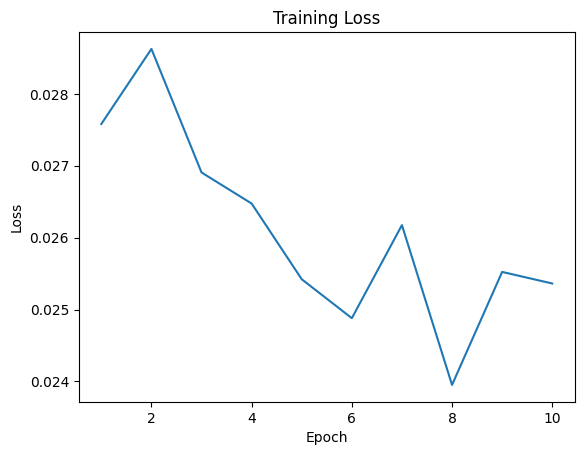

Training finished


In [30]:
import matplotlib.pyplot as plt
import time

# Initialize an empty list to store the loss values
train_losses = []

# Training loop

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    for images, labels in train_iterator:
        images = images.to(device)
        labels = labels.to(device)
        opt.zero_grad()
        # forward pass
        output = model(images)
        l = loss(output, labels)
        l.backward()
        opt.step()
        
        running_loss += l.item()
    # stop timer
    end_time = time.time()
    epoch_time = end_time - start_time
        #print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_iterator):.4f}")

    train_losses.append(running_loss / len(train_iterator))
print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Time: {epoch_time:.2f} seconds")

# visualize the training progress

plt.plot(range(1, num_epochs+1),
        train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

print("Training finished")